In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pyusadel import (
    DifferentialOperators,
    UsadelProblem,
)

In [3]:
Nsites = 1

do = DifferentialOperators()
do.D_x = np.zeros((1, 1), dtype=float)
do.D_y = np.zeros((1, 1), dtype=float)
do.D_z = np.zeros((1, 1), dtype=float)
do.L = np.zeros((1, 1), dtype=float)

h_x = np.array([0.1])
h_y = np.array([0])
h_z = np.array([0])
tau_sf_inv = np.array([0.0])
tau_so_inv = np.array([0])
D = 0
T = 0.2

up = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_sf_inv=tau_sf_inv,
    tau_so_inv=tau_so_inv,
    D=D,
    T=T,
)

up.Delta = np.array([1])

In [4]:
# Execute a self-consistent calculation to determine the gap Delta
up.solve_self_consistent() 

  1    Max Delta: 1.113    Residual: 1.01e-01    Free energy: -9.93e-01
  2    Max Delta: 1.215    Residual: 8.42e-02    Free energy: -1.10e+00
  3    Max Delta: 1.306    Residual: 6.94e-02    Free energy: -1.19e+00
  4    Max Delta: 1.385    Residual: 5.69e-02    Free energy: -1.26e+00
  5    Max Delta: 1.452    Residual: 4.64e-02    Free energy: -1.30e+00
  6    Max Delta: 1.509    Residual: 3.76e-02    Free energy: -1.34e+00
  7    Max Delta: 1.556    Residual: 3.05e-02    Free energy: -1.36e+00
  8    Max Delta: 1.595    Residual: 2.46e-02    Free energy: -1.38e+00
  9    Max Delta: 1.628    Residual: 1.98e-02    Free energy: -1.39e+00
 10    Max Delta: 1.654    Residual: 1.59e-02    Free energy: -1.40e+00
 11    Max Delta: 1.675    Residual: 1.28e-02    Free energy: -1.40e+00
 12    Max Delta: 1.693    Residual: 1.03e-02    Free energy: -1.41e+00
 13    Max Delta: 1.707    Residual: 8.22e-03    Free energy: -1.41e+00
 14    Max Delta: 1.718    Residual: 6.58e-03    Free energy: -1

In [5]:
# Solve for the spectral quantities, first define an energy axis then execute the calculation
up.set_real_omega_ax(-5, 5, 101)
up.solve_spectral()

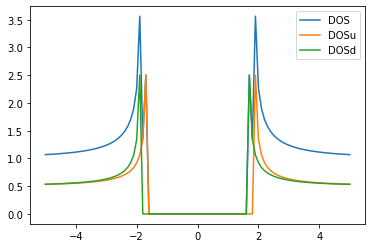

In [6]:
fig, ax = plt.subplots()
ax.plot(up.get_omega_ax_r(), up.get_dos(), label="DOS")
ax.plot(up.get_omega_ax_r(), up.get_spin_resolved_dos("x")[0], label="DOSu")
ax.plot(up.get_omega_ax_r(), up.get_spin_resolved_dos("x")[1], label="DOSd")
ax.legend()

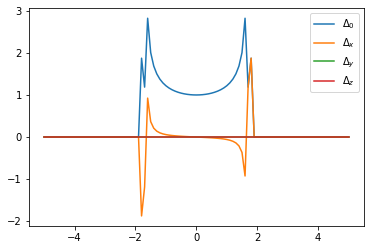

In [7]:
fig, ax = plt.subplots()
ax.plot(up.get_omega_ax_r(), up.get_pairing_amplitudes()[0], label="$\Delta_{0}$")
ax.plot(up.get_omega_ax_r(), up.get_pairing_amplitudes()[1], label="$\Delta_{x}$")
ax.plot(up.get_omega_ax_r(), up.get_pairing_amplitudes()[2], label="$\Delta_{y}$")
ax.plot(up.get_omega_ax_r(), up.get_pairing_amplitudes()[3], label="$\Delta_{z}$")
ax.legend()